<a href="https://colab.research.google.com/github/AsmaBenHmidene/CDF-to-Calculate-Probabilities/blob/main/CDF_to_Calculate_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the human height data set:

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean (hint: do you know this answer intuitively?)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
filepath ='/content/drive/MyDrive/Coding Dojo/data enrichment/week3/weight-height male-female - weight-height.csv'
df = pd.read_csv(filepath)
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [6]:
filter = df['Gender'] == 'Female'
df_females = df.loc[filter,:].copy()
df_females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


# 1.between 55.0 and 56.0 inches

In [7]:
low_end = 55.0
high_end = 56.0

In [8]:
data = df_females['Height']

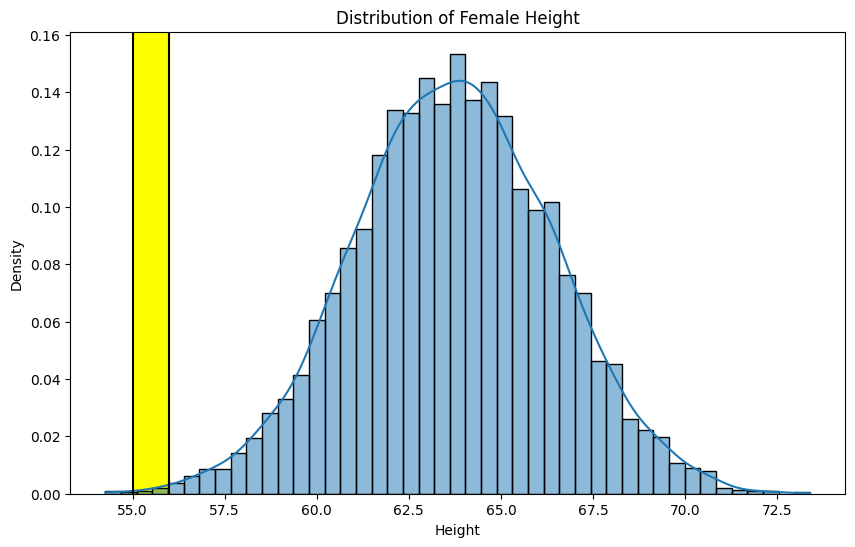

In [9]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density',kde=True)
ax.set_title('Distribution of Female Height')
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0);

In [10]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [11]:
x_range = np.linspace(min, max,1000)

In [12]:
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

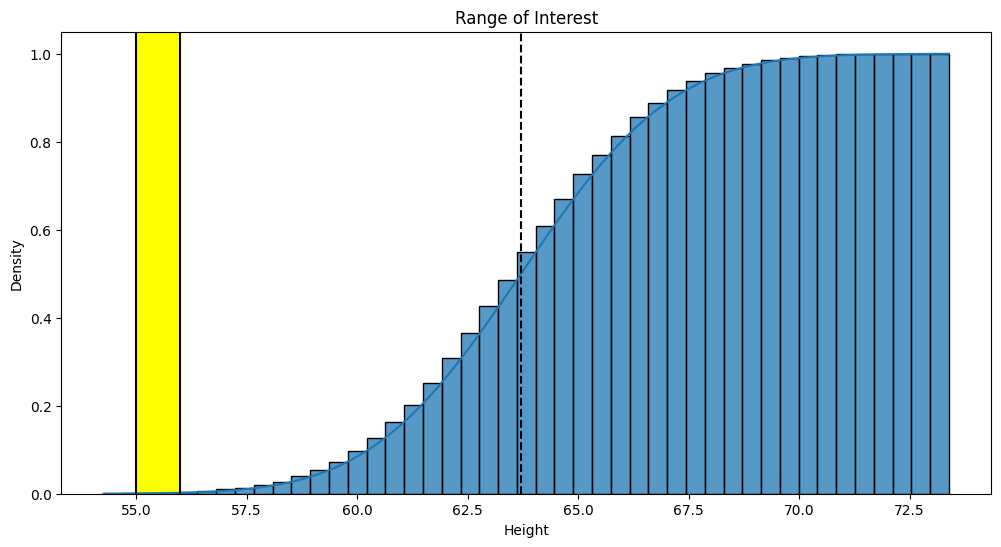

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(mean,color='k',ls='--');
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [13]:
stats.norm.cdf(high_end, loc=mean,scale=std) - stats.norm.cdf(low_end,loc=mean, scale=std)

0.0015043054289559745

There is a 0.0015 probability (or an 0.15% chance) of a female having a height between 55 and 56 inches.

# 2. is less than 5 feet (60 in)

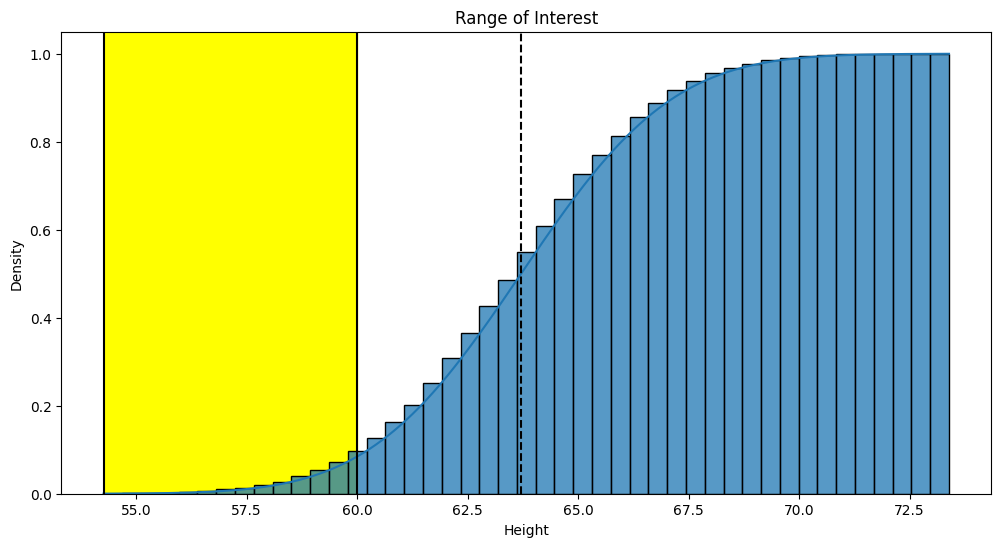

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(mean,color='k',ls='--');
ax.axvline(min, color= 'black')
ax.axvline(60, color ='black')
ax.axvspan(min, 60, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [17]:
stats.norm.cdf(60, loc=mean,scale=std)

0.0844649272520746

There is a 0.084 probability (or an 8.4% chance) of a female having a height less than 60 inches.

# 3. is greater than the mean

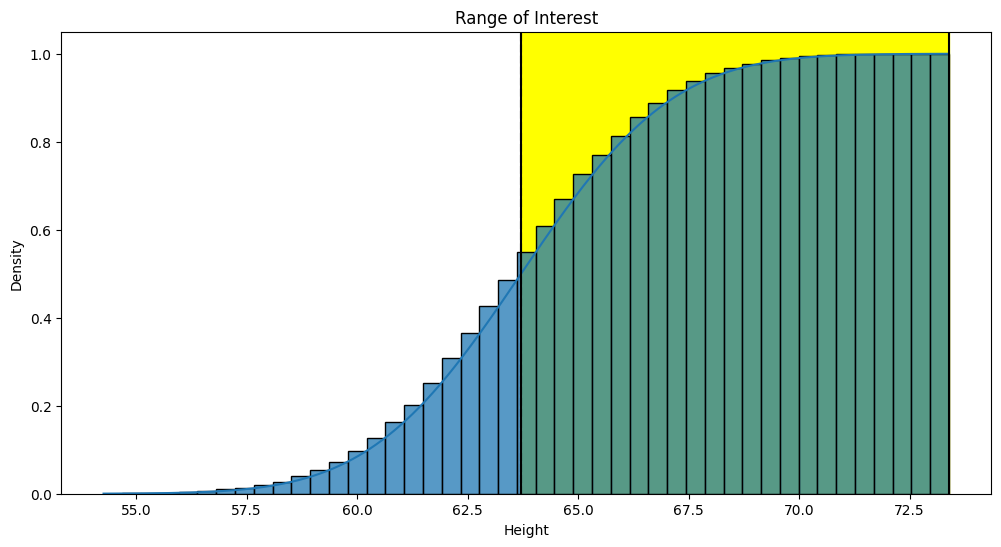

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(mean,color='k',ls='--');
ax.axvline(mean, color= 'black')
ax.axvline(max, color ='black')
ax.axvspan(mean, max, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [20]:
1 - stats.norm.cdf(mean, loc=mean,scale=std)

0.5

There is a  50 % chance of a female having a height greater than the mean.